In [10]:
import time
import warnings
import csv
import numpy as np
import pandas as pd
from pandas import DataFrame
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import pylab
from matplotlib.colors import ListedColormap
import matplotlib as mpl
from matplotlib import cm
from matplotlib import pyplot
from matplotlib.ticker import NullFormatter
from collections import OrderedDict
%matplotlib inline


from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.cluster import k_means
from sklearn.datasets import load_digits

from itertools import cycle, islice
from mpl_toolkits.mplot3d import Axes3D



In [11]:
data = np.loadtxt( 'data_t-SNE_310101_d5_R100_e1_N800.dat')

In [12]:
print(data)

[[-8.30650e+04  2.95210e+04  6.88150e+04 -1.00340e+05 -2.92350e+04]
 [-1.10304e+05  3.85450e+04  6.85190e+04 -1.15776e+05 -4.62870e+04]
 [-8.89080e+04  3.14180e+04  6.91740e+04 -1.07023e+05 -3.01200e+04]
 ...
 [-4.08300e+04 -6.09670e+04 -7.61340e+04 -3.09400e+03 -8.51600e+03]
 [-8.66300e+03  3.48560e+04  7.26890e+04 -4.85300e+04 -1.15000e+02]
 [ 1.53830e+04 -3.13700e+04 -5.09380e+04  3.39710e+04  8.42700e+03]]


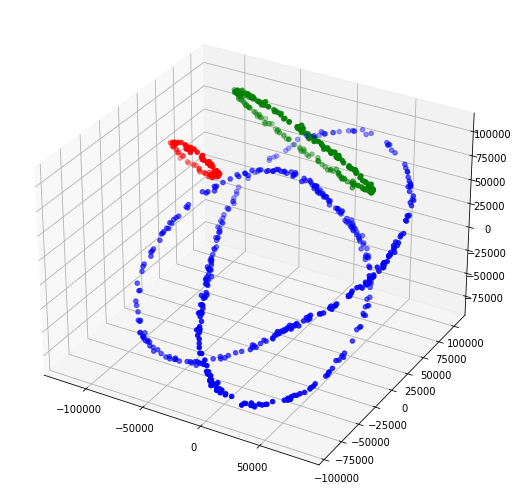

In [13]:
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')

#ax.scatter(data[:,0], data[:,1], data[:,2])
ax.scatter(data[:80, 0], data[:80, 1], data[:80, 2], c="r")
ax.scatter(data[80:320, 0], data[80:320, 1],data[80:320, 2], c="g")
ax.scatter(data[320:, 0], data[320:, 1],data[320:, 2], c="b")
plt.show()

In [14]:
data_embedded1 = TSNE(n_components=3, perplexity=5).fit_transform(data)
data_embedded1.shape

data_embedded2 = TSNE(n_components=3, perplexity=30).fit_transform(data)
data_embedded2.shape

data_embedded3 = TSNE(n_components=3, perplexity=50).fit_transform(data)
data_embedded3.shape

data_embedded4 = TSNE(n_components=3, perplexity=100).fit_transform(data)
data_embedded4.shape

(800, 3)

Text(0.5, 0.92, 'Perplexity=100')

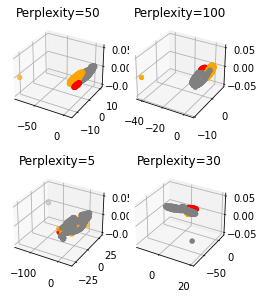

In [15]:
fig = plt.figure(figsize=plt.figaspect(2.5))
#  First subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(data_embedded1[:80, 0], data_embedded1[:80, 1],  c="r")
ax.scatter(data_embedded1[80:320, 0], data_embedded1[80:320, 1], c="orange")
ax.scatter(data_embedded1[320:, 0], data_embedded1[320:, 1], c="gray")
ax.set_title("Perplexity=5")

# Second subplot
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(data_embedded2[:80, 0], data_embedded2[:80, 1], c="r")
ax.scatter(data_embedded2[80:320, 0], data_embedded2[80:320, 1], c="orange")
ax.scatter(data_embedded2[320:, 0], data_embedded2[320:, 1], c="gray")
ax.set_title("Perplexity=30")

# Third subplot
ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.scatter(data_embedded3[:80, 0], data_embedded3[:80, 1], c="r")
ax.scatter(data_embedded3[80:320, 0], data_embedded3[80:320, 1], c="orange")
ax.scatter(data_embedded3[320:, 0], data_embedded3[320:, 1], c="gray")
ax.set_title("Perplexity=50")

# Forth subplot
ax = fig.add_subplot(2, 2, 2, projection='3d')
ax.scatter(data_embedded4[:80, 0], data_embedded4[:80, 1], c="r")
ax.scatter(data_embedded4[80:320, 0], data_embedded4[80:320, 1], c="orange")
ax.scatter(data_embedded4[320:, 0], data_embedded4[320:, 1], c="gray")
ax.set_title("Perplexity=100")


In [16]:
data_embedded1 = TSNE(n_components=2, perplexity=5).fit_transform(data)
data_embedded1.shape

data_embedded2 = TSNE(n_components=2, perplexity=30).fit_transform(data)
data_embedded2.shape

data_embedded3 = TSNE(n_components=2, perplexity=50).fit_transform(data)
data_embedded3.shape

data_embedded4 = TSNE(n_components=2, perplexity=100).fit_transform(data)
data_embedded4.shape



(800, 2)

Text(0.5, 1.0, 'Perplexity=100')

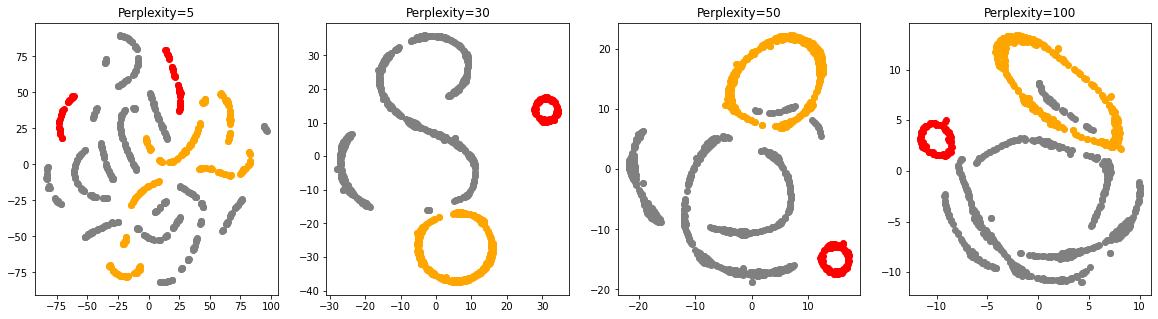

In [17]:
fig, axs = plt.subplots(1, 4)
fig.set_size_inches(20, 5)
axs[0].scatter(data_embedded1[:80, 0], data_embedded1[:80, 1], c="r")
axs[0].scatter(data_embedded1[80:320, 0], data_embedded1[80:320, 1], c="orange")
axs[0].scatter(data_embedded1[320:, 0], data_embedded1[320:, 1], c="gray")
axs[0].set_title("Perplexity=5")

axs[1].scatter(data_embedded2[:80, 0], data_embedded2[:80, 1], c="r")
axs[1].scatter(data_embedded2[80:320, 0], data_embedded2[80:320, 1], c="orange")
axs[1].scatter(data_embedded2[320:, 0], data_embedded2[320:, 1], c="gray")
axs[1].set_title("Perplexity=30")

axs[2].scatter(data_embedded3[:80, 0], data_embedded3[:80, 1], c="r")
axs[2].scatter(data_embedded3[80:320, 0], data_embedded3[80:320, 1], c="orange")
axs[2].scatter(data_embedded3[320:, 0], data_embedded3[320:, 1], c="gray")
axs[2].set_title("Perplexity=50")

axs[3].scatter(data_embedded4[:80, 0], data_embedded4[:80, 1], c="r")
axs[3].scatter(data_embedded4[80:320, 0], data_embedded4[80:320, 1], c="orange")
axs[3].scatter(data_embedded4[320:, 0], data_embedded4[320:, 1], c="gray")
axs[3].set_title("Perplexity=100")

### ---------------------------------------------------------------------------

perform principal component analysis (PCA) on the dataset. We start by downsampling and then perform PCA using sklearn's implementation:

In [18]:
np.random.seed(0) # fixing the random seed

idx = np.arange(len(data))
tval = np.hstack([t]*10000 for t in np.arange(0.25,4.01,0.25)) # Temperature values for each sample
rand = np.random.choice(idx, size=5000, replace=True)
Xdownsample = data[rand]
modelPCA = PCA(n_components=2)
dataPCA = modelPCA.fit_transform(Xdownsample)
component1 = modelPCA.components_[0]
tval = tval[rand]

C:\Users\ADMIN\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  after removing the cwd from sys.path.


In [19]:
xcenter, ypred, _ = k_means(dataPCA, n_clusters=3)
data_dict={}

In [20]:
print(ypred)

[2 0 0 ... 1 1 0]


In [21]:
def clustering(y):
    # Finds position of labels and returns a dictionary of cluster labels to data indices.
    yu = np.sort(np.unique(y))
    clustering = OrderedDict()
    for ye in yu:
        clustering[ye] = np.where(y == ye)[0]
    return clustering

def entropy(c, n_sample):
    # Measures the entropy of a cluster
    h = 0.
    for kc in c.keys():
        p=len(c[kc])/n_sample
        h+=p*np.log(p)
    h*=-1.
    return h

# Normalized mutual information function
# Note that this deals with the label permutation problem
def NMI(y_true, y_pred):
    """ Computes normalized mutual information: where y_true and y_pred are both clustering assignments
    """
    w = clustering(y_true)
    c = clustering(y_pred)
    n_sample = len(y_true)

    Iwc = 0.
    for kw in w.keys():
        for kc in c.keys():
            w_intersect_c=len(set(w[kw]).intersection(set(c[kc])))
            if w_intersect_c > 0:
                Iwc += w_intersect_c*np.log(n_sample*w_intersect_c/(len(w[kw])*len(c[kc])))
    Iwc/=n_sample
    Hc = entropy(c,n_sample)
    Hw = entropy(w,n_sample)

    return 2*Iwc/(Hc+Hw)

In [22]:
n_true_center=15
X, ytrue = make_blobs(10000, 2, n_true_center)

print(ytrue)

[ 1 11  3 ...  3  3  7]


C:\Users\ADMIN\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass centers=15 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


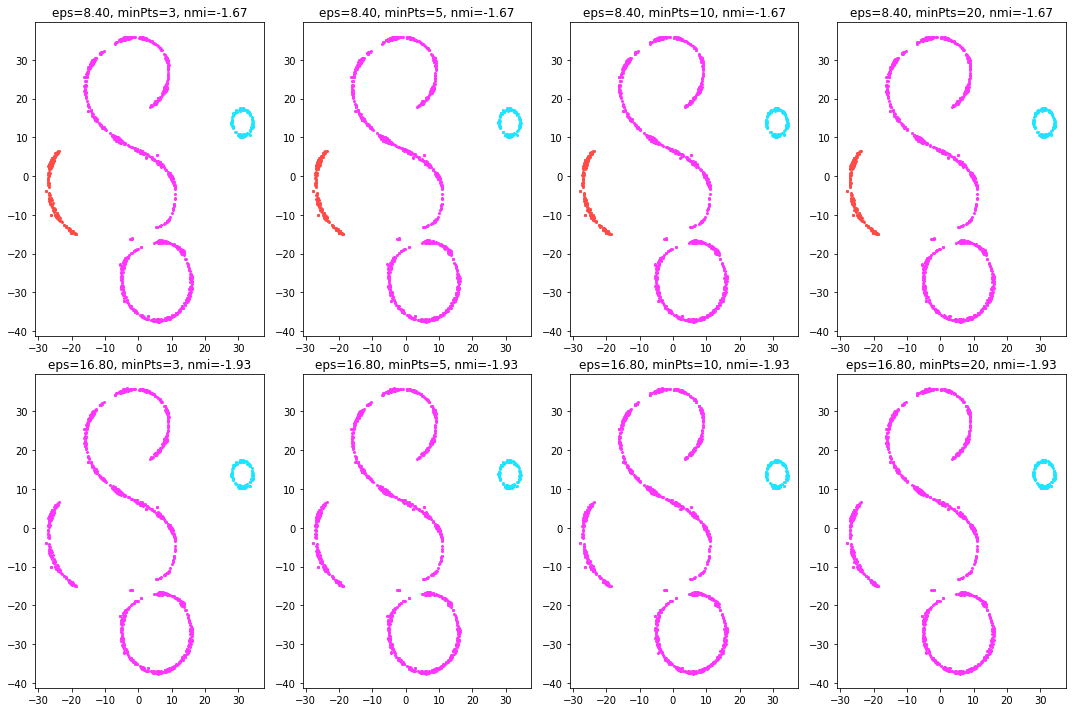

In [23]:
cpalette = ["#1CE6FF", "#FF34FF", "#FF4A46","#008941", "#006FA6", "#A30059", "#0000A6", "#63FFAC","#B79762", "#004D43", "#8FB0FF", "#997D87","#5A0007", "#809693","#1B4400", "#4FC601", "#3B5DFF", "#4A3B53","#886F4C","#34362D", "#B4A8BD", "#00A6AA", "#452C2C","#636375", "#A3C8C9", "#FF913F", "#938A81","#575329", "#00FECF", "#B05B6F"]

def plotting_ax(data_embedded2, y, ax):
    # plotting function
    for i, yu in enumerate(np.unique(ytrue)):
        pos = (y == yu)
        ax.scatter(data_embedded2[pos,0], data_embedded2[pos,1],c=cpalette[i%len(cpalette)],s=4)


eps_range = [8.4,16.8]
min_sample_range = [3,5,10,20]
fig, ax = plt.subplots(len(eps_range),len(min_sample_range),figsize=(15,10))
for i, eps in enumerate(eps_range):
    for j, min_samples in enumerate(min_sample_range):
        model = DBSCAN(eps=eps, min_samples=min_samples)
        model.fit(data_embedded2)
        y = model.labels_
        plotting_ax(data_embedded2, y,ax[i,j])
        nmi=NMI(y, ytrue)
        ax[i,j].set_title('eps=%.2f, minPts=%i, nmi=%.2f'%(eps,min_samples,nmi))
plt.tight_layout(h_pad=0.5)
plt.show()

### ---------------------------------------------------------------------------

In [24]:
# random seed for reproducibility
np.random.seed(12345)
L=36
def pattern(X,l0,l1):
    """ zeros in the positions of list l0,
        ones in the positions of list l1"""
    X[l0] = 0
    X[l1] = 1
    return X
xx = np.random.randint(0,2,size=L)
print(xx)
xx = pattern(xx,[0,1,2,3,4,5,6,7],[-8,-7,-6,-5,-4,-3,-2,-1])
print(xx)

[0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1]
[0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1]


In [25]:
# random seed for reproducibility
np.random.seed(12345)
N=400
L=36
M=5
y = np.zeros(N).astype(int)
x = np.random.randint(0,2,size=(N,L))

for n in range(4):
    print(x[n])
print("")

for n in range(N):
    y[n] = np.random.randint(0,M) # numpy: 0 to M-1, if M
        
    if y[n]==0:
        x[n] = pattern(x[n],[3,4,14,16,22,25,27,32],[0,5,7,9,12,15,26,30])
    elif y[n]==1:
        x[n] = pattern(x[n],[0,11,12,23,24,28,33],[2,4,6,25,26,30,31])
    elif y[n]==2:
        x[n] = pattern(x[n],[0,5,8,15,19,34],[5,9,10,15,26,29])
    elif y[n]==3:
        x[n] = pattern(x[n],[6,7,16,24,26],[3,5,13,16,27])
    elif y[n]==4:
        x[n] = pattern(x[n],[5,12,22,28],[4,5,30,34])
            
for n in range(30):
    print(x[n],y[n])

[0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1]
[1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 0 0 1 0 1 0]
[0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0]
[0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1]

[0 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 1 1 1 0 0 1] 1
[1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 1 0] 3
[0 0 1 1 0 1 0 0 0 1 1 0 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0] 2
[0 1 1 1 0 1 0 0 0 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1] 3
[0 1 0 1 1 1 0 1 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1] 2
[0 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 0 0 0 0 0 1 1 1 0 0 1 1 1 0 1 1 0] 4
[0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0] 3
[0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0] 1
[0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0] 4
[1 1 1 0 0 1 0 1 1 

In [26]:
# create directory DATA
!mkdir DATA

str0 = f'M{M}_N{N}'
print(str0)
fname='DATA/x_'+str0+'.csv'
np.savetxt(fname,x,delimiter=" ",fmt='%i')
fname='DATA/y_'+str0+'.csv'
np.savetxt(fname,y,fmt='%i')

M5_N400


A subdirectory or file DATA already exists.


In [27]:
str0 = "M5_N400"
fnamex = "DATA/x_"+str0+".csv"
fnamey = "DATA/y_"+str0+".csv"

x= np.loadtxt(fnamex,dtype=float)
y = np.loadtxt(fnamey, dtype=float)

print(x)
print(y)

[[0. 1. 1. ... 0. 0. 1.]
 [1. 1. 1. ... 0. 1. 0.]
 [0. 0. 1. ... 1. 0. 0.]
 ...
 [0. 0. 1. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 1. 1.]]
[1. 3. 2. 3. 2. 4. 3. 1. 4. 0. 3. 4. 0. 3. 4. 1. 4. 3. 1. 3. 2. 2. 0. 3.
 4. 3. 2. 2. 3. 2. 1. 2. 0. 1. 2. 0. 0. 4. 1. 4. 4. 0. 3. 0. 1. 4. 3. 3.
 2. 3. 4. 0. 0. 4. 4. 4. 4. 3. 4. 2. 3. 3. 1. 1. 4. 2. 4. 0. 0. 3. 2. 2.
 3. 2. 0. 1. 0. 2. 3. 2. 0. 2. 4. 0. 4. 2. 1. 3. 1. 0. 0. 3. 3. 1. 4. 4.
 2. 2. 0. 0. 3. 1. 0. 0. 4. 3. 1. 4. 1. 0. 1. 0. 0. 1. 0. 3. 2. 4. 2. 0.
 2. 4. 1. 3. 0. 4. 0. 2. 3. 2. 2. 1. 2. 2. 2. 0. 0. 1. 2. 3. 4. 2. 4. 4.
 0. 3. 3. 0. 1. 0. 0. 0. 4. 4. 3. 4. 2. 3. 1. 1. 1. 0. 0. 1. 3. 1. 3. 1.
 4. 4. 0. 3. 0. 4. 4. 1. 0. 1. 2. 3. 1. 1. 3. 2. 2. 2. 3. 4. 3. 0. 0. 2.
 3. 3. 0. 2. 3. 0. 3. 3. 4. 4. 4. 3. 4. 0. 3. 1. 4. 1. 3. 3. 4. 4. 4. 0.
 3. 4. 0. 1. 2. 2. 1. 3. 1. 4. 4. 3. 4. 4. 2. 3. 1. 1. 1. 3. 3. 1. 0. 1.
 0. 4. 2. 2. 0. 2. 3. 0. 3. 2. 3. 4. 1. 3. 1. 0. 1. 3. 4. 2. 1. 2. 0. 0.
 2. 2. 3. 2. 0. 2. 0. 3. 1. 0. 4. 3. 4. 4

In [28]:
x_embedded = TSNE(n_components=2, perplexity=100).fit_transform(x)
x_embedded.shape

(400, 2)

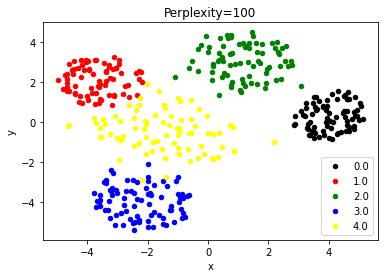

In [29]:
df = DataFrame(dict(x=x_embedded[:,0], y=x_embedded[:,1], label=y))
colors = {0:'black', 1:'red', 2:'green', 3:'blue', 4:'yellow'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key,
               color=colors[key], title="Perplexity=100")
pyplot.show()


In [30]:
n_true_center=20
X, ytrue = make_blobs(10000, 2, n_true_center)

print(ytrue)

[18  0  9 ...  3 12 16]


C:\Users\ADMIN\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass centers=20 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


C:\Users\ADMIN\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass centers=20 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


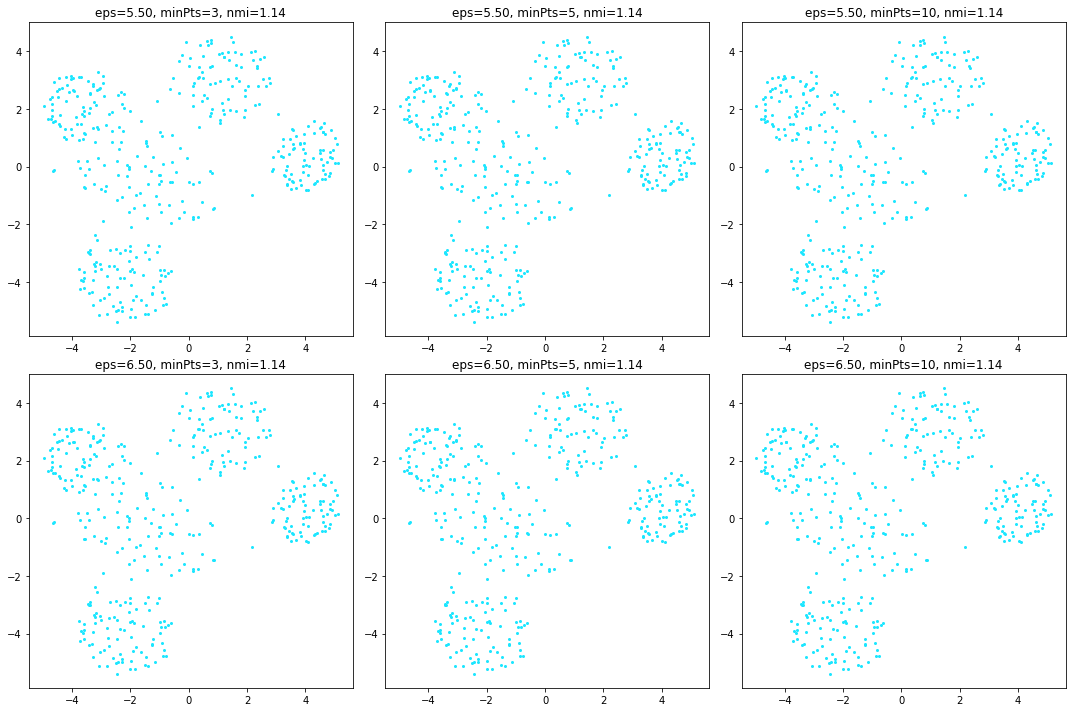

In [33]:
cpalette = ["#1CE6FF", "#FF34FF", "#FF4A46","#008941", "#006FA6", "#A30059", "#0000A6", "#63FFAC","#B79762", "#004D43", "#8FB0FF", "#997D87","#5A0007", "#809693","#1B4400", "#4FC601", "#3B5DFF", "#4A3B53","#886F4C","#34362D", "#B4A8BD", "#00A6AA", "#452C2C","#636375", "#A3C8C9", "#FF913F", "#938A81","#575329", "#00FECF", "#B05B6F"]
def plotting_ax(x_embedded, y, ax):
    # plotting function
    for i, yu in enumerate(np.unique(y)):
        pos = (y == yu)
        ax.scatter(x_embedded[pos,0], x_embedded[pos,1],c=cpalette[i%len(cpalette)],s=4)
n_true_center=20
X, ytrue = make_blobs(10000, 2, n_true_center)
eps_range = [5.5,6.5]
min_sample_range = [3,5,10]
fig, ax = plt.subplots(len(eps_range),len(min_sample_range),figsize=(15,10))
for i, eps in enumerate(eps_range):
    for j, min_samples in enumerate(min_sample_range):
        model = DBSCAN(eps=eps, min_samples=min_samples, metric='l1')
        model.fit(x_embedded)
        y = model.labels_
        plotting_ax(x_embedded,y,ax[i,j])
        nmi=NMI(y, ytrue)
        ax[i,j].set_title('eps=%.2f, minPts=%i, nmi=%.2f'%(eps,min_samples,nmi))
plt.tight_layout(h_pad=0.5)
plt.show()